In [20]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
cust_data = pd.read_csv("Mall_Customers.csv")

In [3]:
cust_data.shape

(200, 5)

In [4]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#gender column
cust_data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

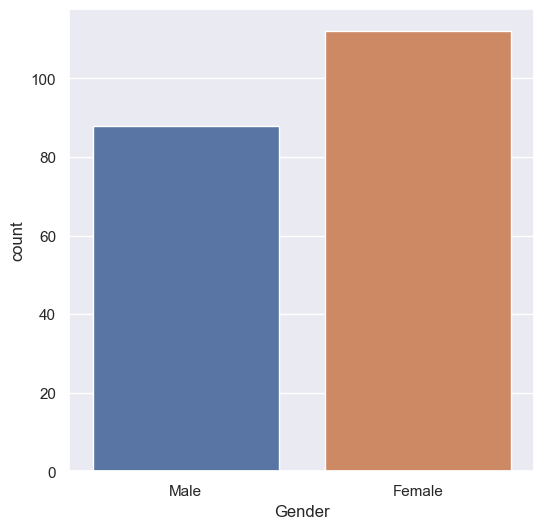

In [7]:
#visual representation
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'Gender', data = cust_data)
plt.show()

In [11]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## separating the annual income and spending score columns

In [55]:
X = cust_data.iloc[:, [3,4]].values

## Choosing the number of clusters
### WCSS --> Within the clusters sum of squares

In [57]:
#finding the wcss value for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [58]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

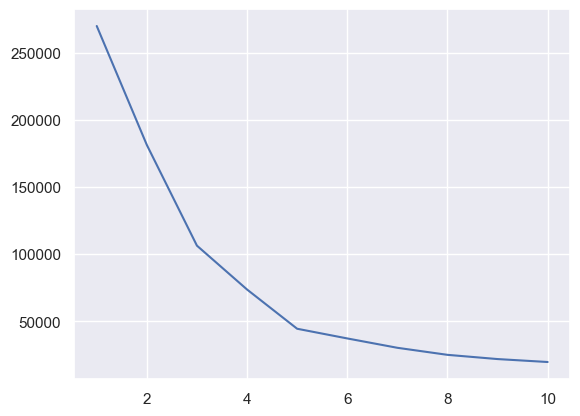

In [59]:
#plotting elbow graph
plt.plot(range(1,11), wcss)
plt.xlabel = "No. of clusters"
plt.ylabel = "WCSS"
plt.title = "Elbow point Graph"
plt.show()

In [60]:
#last elbow will be taken --> 5
#training the model with optimum clusters = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
#label for each datapoints based on the cluster
Y = kmeans.fit_predict(X)

In [62]:
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Visualizing each clusters

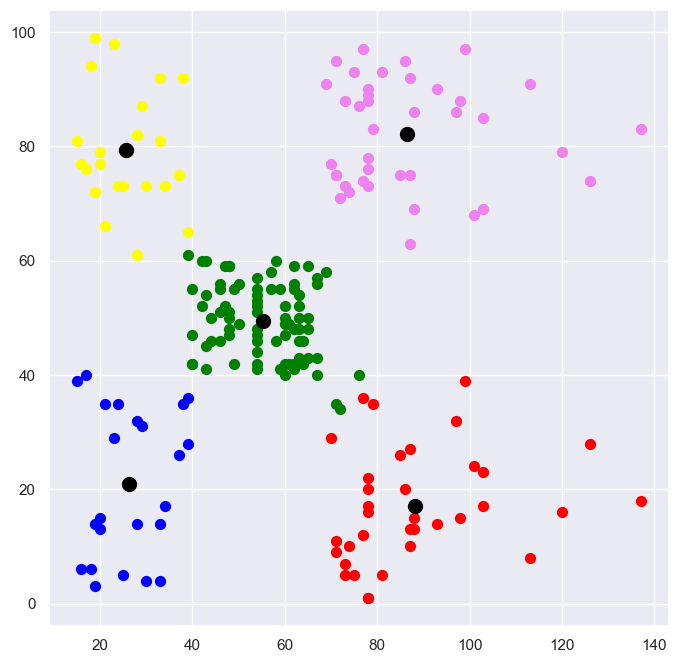

In [67]:
#plotting all the clusters and their centroid
plt.figure(figsize=(8,8))
#clusters
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="blue", label="Cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="yellow", label="Cluster 4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="violet", label="Cluster 5")
#centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label="Centroids")
#labels and title
plt.title = "Customer Clusters"
plt.xlabel = "Annual Income"
plt.ylabel = "Spending Score"
plt.show()

## Separating Age and spending score columns

In [80]:
sep_col = cust_data.iloc[:,[2,4]].values

## Choosing number of clusters 

In [81]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sep_col)
    wcss.append(kmeans.inertia_)

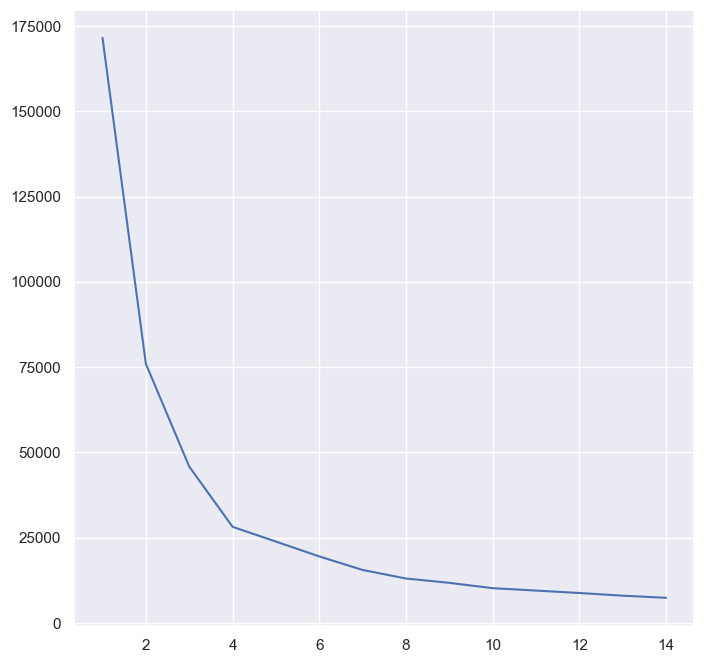

In [82]:
#plotting the elbow graph
plt.figure(figsize=(8,8))
plt.plot(range(1,15), wcss)
plt.title = "Elbow point graph"
plt.xlabel = "Number of clusters"
plt.ylable = "WCSS"
plt.show()

- optimum number of clusters = 4

In [83]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
Y = kmeans.fit_predict(sep_col)

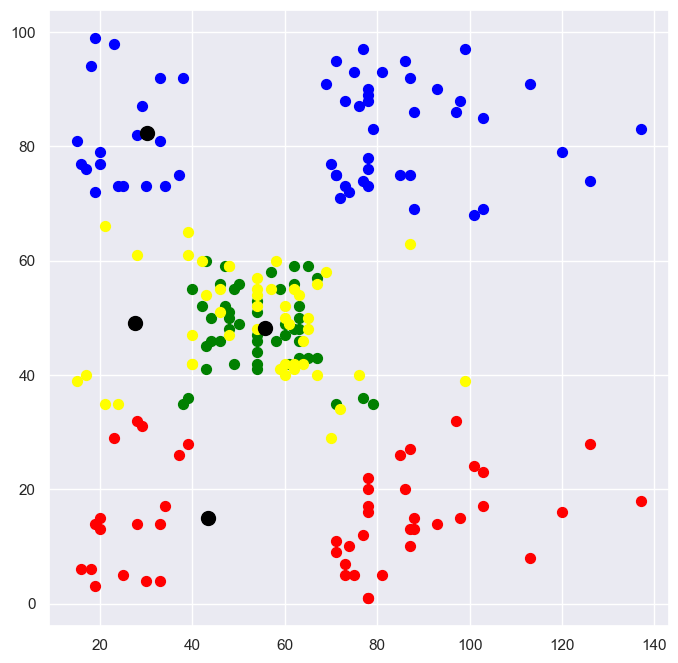

In [85]:
#showing the clusters in graph
plt.figure(figsize=(8,8))
#clusters
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="blue", label="Cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="yellow", label="Cluster 4")
#centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label = "centroids")
#titles and labels
plt.title = "Cluster of Age and spending score"
plt.xlabel = "Age"
plt.ylabel = "Spending Score"
plt.show()